## Final Project Submission

Please fill out:
* Student name: Dorine Langat 
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Microsoft's New Movie Studio

## Overview

Microsoft has learnt that other big companies are creating video content and they want in on the fun too. However, they know nothing about creating movies. We are tasked with the responsibility of exploring the type of films currently doing best at box office and give actionable recommendations to Microsoft to venture into the film industry successfully.

The data method used in this project is exploratory data analysis, whereby we'll look into four different datasets and find relevant information that will help us provide clear recommendations.

Some of the results obtained from this analysis among others, show that the top 3 most profitable genres are Science Fiction & Fantasy, Action & Adventure, and Kids & family.

We therefore recommend Microsoft to create films along those genres as they are most likely to earn them more profits.

## Business Problem

Microsoft is inspred to start creating movies  like other big companies. However, Microsoft has no idea how to go about it. 

We are therefore tasked with the responsibility of exploring the type of films doing best currently to help Microsoft venture into this industry successfully. 

In order to objectively provide clear recommendations that will be beneficial to Microsoft, the following questions will act as a guide to drawing insights from our datasets.

     * Which film production studio made the highest total gross revenue in box office.

     * Is there a relationship between the prduction budget and the revenue made.

     * How does the original language of a film affect its popularity.

     * How is the trend of film runtime over the years.

     * What is the correlation between critics' score and the people's score.

     * What are the top ten most profitable genre.


## Data Understanding

 The for datasets we'll be working with here are 'bom.movie_gross.csv', 'tmdb.movies.csv', 'tn.movie_budgets.csv', and 'rotten_tomatoes_top_movies.csv'. 

    * The 'bom.movie_gross.csv' dataset is a box office dataset showing the domestic and foreign gross revenues of each movie.
  
    * The 'tmdb.movies.csv' dataset shows the original languages of different movies and their percentage popularity.
  
    * The 'tn.movie_budgets.csv' dataset shows production budgets and their corresponding worldwide gross revenue.
  
    *The 'rotten_tomatoes_top_movies.csv' dataset shows the box office performance of each movie and their genres in USA.
 
 These first three datasets can be found in a zipped file in [GitHub](https://github.com/learn-co-curriculum/dsc-project-template/tree/template-mvp/zippedData), and the fourth dataset can be found in [Kaggle](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset).

 These datasets will help us answer the questions above.


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

## 1. 

In this section, we find out which studio makes the most revenue by calculating the total gross revenue of a film per studio.

In [3]:
# loading our first dataset as bom_df
bom_df = pd.read_csv('bom.movie_gross.csv')
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Lets inspect our first dataset if there are missing values, and the datatype of each column. Then we drop the rows with missing values and convert the columns to our preferred data types.

In [4]:
# inspecting our dataset
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
# removing commas in the dataset
bom_df.replace(',','', regex=True, inplace=True)

In [6]:
# dropping all the rows containing null values
bom_df.dropna(inplace=True)

In [7]:
# converting the foreign_gross column from object dtype to float dtype 
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype(float)

In [8]:
# confirming the changes
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


We now want to visualize the average amount of money made by a studio per film.

In [9]:
# creating a new column 'total_gross_(in millions)' which is the sum of domestic and foreign gross.
bom_df['total_gross_in_millions'] = (bom_df['domestic_gross']/1000000) + (bom_df['foreign_gross']/1000000)
bom_df.head(2)

,title,studio,domestic_gross,foreign_gross,year,total_gross_in_millions
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025.5


In [10]:
# dropping columns that we do not need
bom_df = bom_df.drop(columns = ['title', 'domestic_gross', 'foreign_gross', 'year'])

In [11]:
# grouping the dataset by the studio, and calculate the mean of the total income for the films produced
columns = ['studio', 'total_gross_in_millions']
bom_df = bom_df.groupby('studio')['total_gross_in_millions'].mean()
bom_df = bom_df.reset_index()
bom_df

,studio,total_gross_in_millions
0,3D,16.000000
1,A24,26.258895
2,AF,2.327500
3,AGF,0.176800
4,AR,58.050000
...,...,...
167,WOW,0.049400
168,Wein.,59.360909
169,Yash,49.205750
170,Zee,1.671000


In [12]:
# sorting the sum of the total gross income from the highest
bom_df = bom_df.sort_values('total_gross_in_millions', ascending=False)
# select the top 20 studios
bom_df1 =bom_df.head(20)

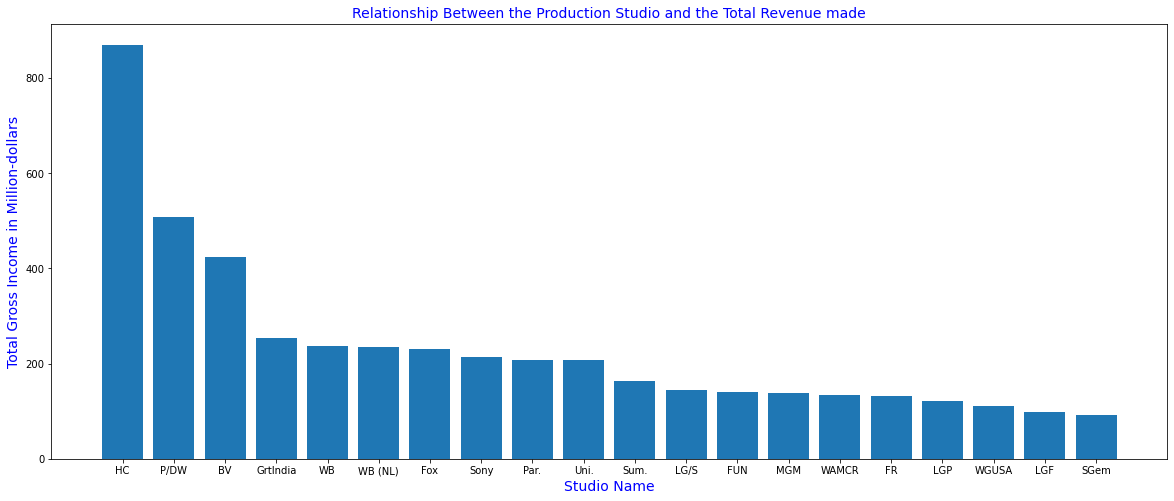

In [13]:
# plotting a barplot for the top 20 films in box office and the studio of production
fig, ax = plt.subplots(figsize=(20,8))

plt.style.use('ggplot')
plt.bar( x= bom_df1['studio'], height= bom_df1['total_gross_in_millions'])

plt.xlabel('Studio Name',color = 'blue', fontsize=14)
plt.ylabel('Total Gross Income in Million-dollars',color = 'blue', fontsize=14)
plt.title('Relationship Between the Production Studio and the Total Revenue made', color = 'blue', fontsize=14)
plt.show()

##### From the above barplot, we can look at the average of the total gross revenue that each of the top 20 studios have made over the years from 2010 to 2018 per film produced. The top 5 five studios are HC, P/DW, BV, GrtIndia, and WB. 

## 2.

In this section, our aim is to find out whether the original language of a film affects its popularity for films produced since the year 2000.

In [14]:
#loading our second dataset as tmdb_df
tmdb_df = pd.read_csv('tmdb.movies.csv', index_col=0)
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [15]:
#converting the release date column to datetime dtype
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], format = '%Y/%m/%d')

In [16]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


In [17]:
#sorting data from the oldest film to the most recent
tmdb_df.sort_values(by='release_date', inplace = True)
tmdb_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
14335,"[18, 10752]",143,en,All Quiet on the Western Front,9.583,1930-04-29,All Quiet on the Western Front,7.8,299
21758,"[27, 53]",43148,en,The Vampire Bat,2.292,1933-01-21,The Vampire Bat,5.6,23
3580,"[35, 18, 10749]",263768,fr,Le Bonheur,1.653,1936-02-27,Le Bonheur,8.7,3
26345,[],316707,en,How Walt Disney Cartoons Are Made,0.600,1939-01-19,How Walt Disney Cartoons Are Made,7.3,3
11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243
...,...,...,...,...,...,...,...,...,...
24819,[18],481880,en,Trial by Fire,4.480,2019-05-17,Trial by Fire,7.0,3
24003,"[18, 9648, 53]",411144,en,We Have Always Lived in the Castle,14.028,2019-05-17,We Have Always Lived in the Castle,5.2,24
24892,[99],541577,en,This Changes Everything,3.955,2019-06-28,This Changes Everything,0.0,1
24265,"[10749, 18]",428836,en,Ophelia,8.715,2019-06-28,Ophelia,0.0,4


In [18]:
#fitering the dataframe to remain with data from the year 2000
tmdb_df1 = tmdb_df[(tmdb_df['release_date'] >= '2000-01-01')]
tmdb_df1

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
6610,"[10402, 99]",59991,en,Horowitz in Moscow,0.947,2000-04-04,Horowitz in Moscow,4.8,2
5352,"[80, 18, 878, 53]",10559,en,Frequency,8.833,2000-04-28,Frequency,7.1,791
5783,"[16, 10751, 35]",21036,ja,パンダコパンダ,3.416,2000-07-25,Panda! Go Panda!,6.2,37
2594,"[18, 10402]",786,en,Almost Famous,11.022,2000-09-15,Almost Famous,7.5,1339
58,[18],705,en,All About Eve,13.163,2000-10-06,All About Eve,8.2,685
...,...,...,...,...,...,...,...,...,...
24819,[18],481880,en,Trial by Fire,4.480,2019-05-17,Trial by Fire,7.0,3
24003,"[18, 9648, 53]",411144,en,We Have Always Lived in the Castle,14.028,2019-05-17,We Have Always Lived in the Castle,5.2,24
24892,[99],541577,en,This Changes Everything,3.955,2019-06-28,This Changes Everything,0.0,1
24265,"[10749, 18]",428836,en,Ophelia,8.715,2019-06-28,Ophelia,0.0,4


In [19]:
tmdb_df1['original_language'].value_counts()


en    23196
fr      506
es      455
ru      297
ja      259
      ...  
hy        1
af        1
bo        1
xh        1
ha        1
Name: original_language, Length: 76, dtype: int64

In [20]:
#grouping by original language and calculating the popularity mean per original language.
tmdb_df1 = tmdb_df1.groupby('original_language')['popularity'].mean()
tmdb_df1 = tmdb_df1.reset_index()
tmdb_df1

,original_language,popularity
0,ab,0.977800
1,af,4.814000
2,ar,2.707484
3,bg,1.047500
4,bn,1.160000
...,...,...
71,vi,1.158429
72,xh,1.564000
73,xx,0.914167
74,yi,3.614000


In [21]:
#sort the mean of the total gross income from the highest
tmdb_df1 = tmdb_df1.sort_values('popularity', ascending=False)
# select the top 20 studios
tmdb_df2 = tmdb_df1.head(30)

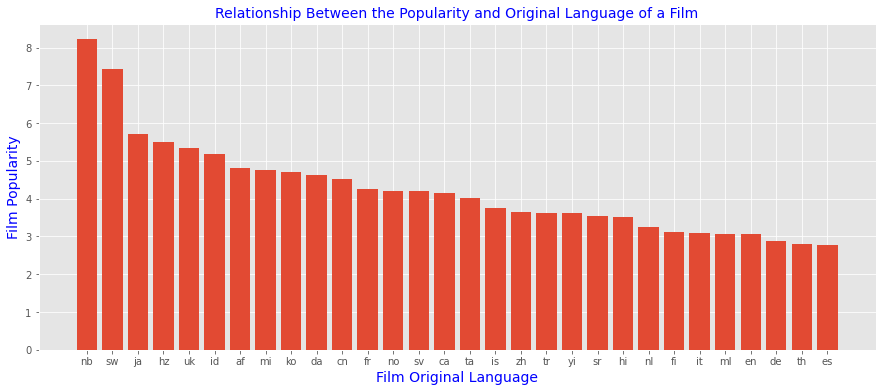

In [22]:
#plotting a barplot for the top 30 common languages and their popularity
fig, ax = plt.subplots(figsize=(15,6))
plt.bar( x= tmdb_df2['original_language'], height= tmdb_df2['popularity'])
plt.xlabel('Film Original Language',color = 'blue', fontsize=14)
plt.ylabel('Film Popularity',color = 'blue', fontsize=14)
plt.title('Relationship Between the Popularity and Original Language of a Film', color = 'blue', fontsize=14)
plt.show()

##### Based on the above visualization, we can see that the original language in which a film is produced does not affects its popularity. However, from our data, we can see that most films are originally created in English. This implies that the language in which a film is originally created in does not guarantee its popularity. 

## 3. 
#### In this section, we explore the relationship between the production budget and the worldwide gross, and also find out the type of correlation between them.

In [23]:
budgets_df = pd.read_csv('tn.movie_budgets.csv', index_col=0)
budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
# inspecting our dataframe for missing values and the columns' datatypes
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [25]:
# checking for duplicated values
budgets_df.duplicated().sum()

0

In [26]:
# removing special characters from specific columns and changing datatype from object to float
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str.replace('\$|,','', regex=True).astype(float)
budgets_df['production_budget'] = budgets_df['production_budget'].str.replace('\$|,','', regex=True).astype(float)

In [27]:
#confirming changes
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   object 
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(2), object(3)
memory usage: 271.0+ KB


In [28]:
#calculating the correlation between production budget and worlwide gross
correlation = budgets_df["production_budget"].corr(budgets_df["worldwide_gross"])
correlation 

0.7483059765694753

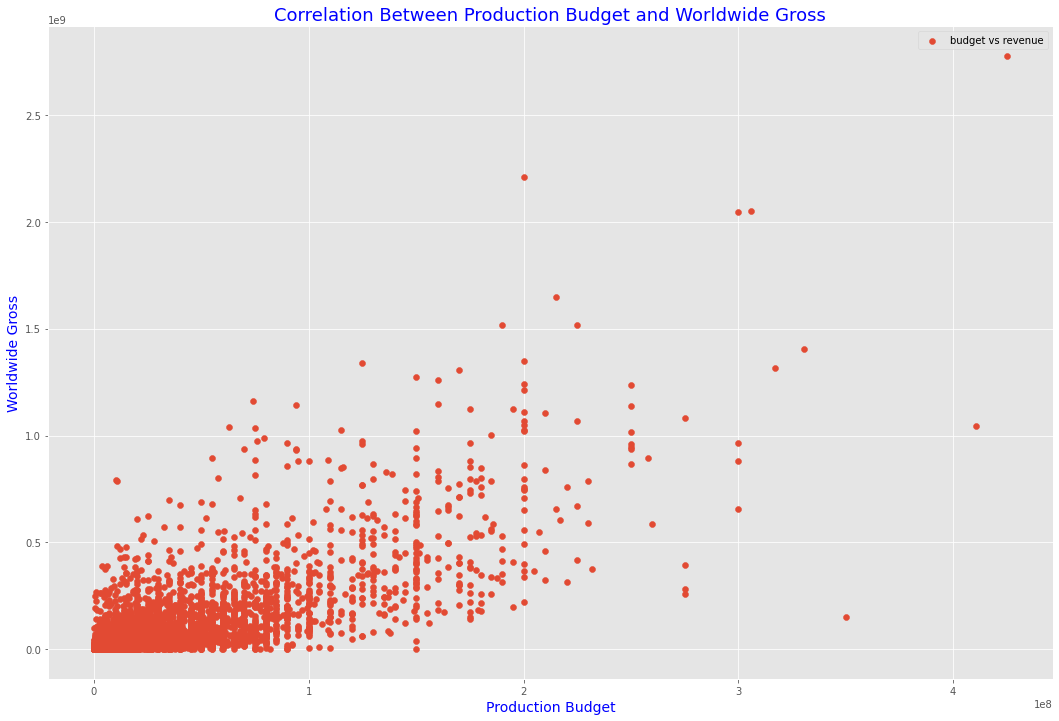

In [29]:
#scatter plot between production budget and worldwide gross
fig, ax = plt.subplots(figsize=(18,12))
plt.style.use('ggplot')
plt.scatter(x=budgets_df['production_budget'], y=budgets_df['worldwide_gross'], label = 'budget vs revenue')

plt.xlabel('Production Budget', color = 'blue', fontsize=14)
plt.ylabel('Worldwide Gross', color = 'blue', fontsize=14)
plt.title('Correlation Between Production Budget and Worldwide Gross', color = 'blue', fontsize=18)

plt.legend()
plt.show();

##### From the scatter plot above, we can see that the correlation between the production budget and the worldwide gross revenue is positive. The scatter plot confirms the value obtained before of 0.748, which is a strong positive correlation. 

## 4.
#### This part explores the relationship between critic score and people score, the trend of film runtime over the years, and the most profitable genres.

In [30]:
rotten_df = pd.read_csv('rotten_tomatoes_top_movies.csv', index_col=0)
rotten_df.head(2)

,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,rating,...,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
0,Black Panther,2018,"After the death of his father, T'Challa return...",96,79.0,Black Panther elevates superhero cinema to thr...,519,"50,000+",Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,...,"Feb 16, 2018 wide","May 2, 2018",$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",http://www.rottentomatoes.com/m/black_panther_...
1,Avengers: Endgame,2019,"Adrift in space with no food or water, Tony St...",94,90.0,"Exciting, entertaining, and emotionally impact...",538,"50,000+",Action & Adventure,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,...,"Apr 26, 2019 wide","Jul 30, 2019",$858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),Marvel Cinematic Universe,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",http://www.rottentomatoes.com/m/avengers_endgame


In [31]:
rotten_df = rotten_df.loc[:, [ 'year', 'critic_score', 'people_score', 'type', 'genre', 'box_office_(gross_usa)', 'runtime']]
rotten_df.head(10)

,year,critic_score,people_score,type,genre,box_office_(gross_usa),runtime
0,2018,96,79.0,Action & Adventure,"adventure, action, fantasy",$700.2M,2h 14m
1,2019,94,90.0,Action & Adventure,"sci fi, adventure, action, fantasy",$858.4M,3h 1m
2,2018,97,88.0,Action & Adventure,"action, mystery and thriller, adventure",$220.1M,2h 27m
3,2015,97,86.0,Action & Adventure,"adventure, action",$153.6M,2h
4,2018,97,93.0,Action & Adventure,"action, adventure, fantasy, comedy, kids and f...",$190.2M,1h 57m
5,2017,93,83.0,Action & Adventure,"adventure, fantasy, action",$412.8M,2h 21m
6,2017,92,81.0,Action & Adventure,"drama, history, war",$188.0M,1h 47m
7,2017,97,94.0,Action & Adventure,"comedy, music, animation, kids and family, adv...",$210.5M,1h 49m
8,2017,93,87.0,Action & Adventure,"comedy, fantasy, sci fi, action, adventure",$315.0M,2h 10m
9,2017,93,90.0,Action & Adventure,"adventure, action, fantasy",$226.3M,2h 17m


In [32]:
rotten_df.duplicated().sum()

0

In [33]:
print(rotten_df.shape)
print()
print(rotten_df.info())

(1610, 7)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1610 non-null   int64  
 1   critic_score            1610 non-null   int64  
 2   people_score            1609 non-null   float64
 3   type                    1610 non-null   object 
 4   genre                   1603 non-null   object 
 5   box_office_(gross_usa)  1102 non-null   object 
 6   runtime                 1603 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 100.6+ KB
None


In [34]:
#dropping rows with missing values
rotten_df = rotten_df.dropna()
rotten_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1609
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1101 non-null   int64  
 1   critic_score            1101 non-null   int64  
 2   people_score            1101 non-null   float64
 3   type                    1101 non-null   object 
 4   genre                   1101 non-null   object 
 5   box_office_(gross_usa)  1101 non-null   object 
 6   runtime                 1101 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 68.8+ KB


In [35]:
rotten_df['type'].nunique()

17

In [36]:
rotten_df['genre'].nunique()

229

In [37]:
# removing special characters and alphabets from box office column and converting the dtype to float
rotten_df['box_office_(gross_usa)'] = rotten_df['box_office_(gross_usa)'].str.replace('\$|,|M|K','', regex=True).astype(float)

In [38]:
#converting the runtime column to minutes only
rotten_df['runtime'] = pd.to_timedelta(rotten_df['runtime'])
### Convert 'timeColumn' to minutes only.
rotten_df['runtime_min'] = rotten_df['runtime'].dt.total_seconds() / 60
rotten_df.head(2)

,year,critic_score,people_score,type,genre,box_office_(gross_usa),runtime,runtime_min
0,2018,96,79.0,Action & Adventure,"adventure, action, fantasy",700.2,0 days 02:14:00,134.0
1,2019,94,90.0,Action & Adventure,"sci fi, adventure, action, fantasy",858.4,0 days 03:01:00,181.0


In [39]:
#sorting by order of years
rotten_df = rotten_df.sort_values('year', ascending=True)
rotten_df

,year,critic_score,people_score,type,genre,box_office_(gross_usa),runtime,runtime_min
213,1925,100,86.0,Art House & International,"mystery and thriller, drama, history",51.0,0 days 01:07:00,67.0
352,1925,100,86.0,Classics,"mystery and thriller, drama, history",51.0,0 days 01:07:00,67.0
21,1927,97,92.0,Action & Adventure,"drama, sci fi",1.2,0 days 02:03:00,123.0
328,1927,97,92.0,Classics,"drama, sci fi",1.2,0 days 02:03:00,123.0
1222,1927,97,92.0,Science Fiction & Fantasy,"drama, sci fi",1.2,0 days 02:03:00,123.0
...,...,...,...,...,...,...,...,...
1273,2020,88,95.0,Science Fiction & Fantasy,"adventure, animation, fantasy, comedy, kids an...",60.4,0 days 01:43:00,103.0
1092,2020,93,59.0,Mystery & Suspense,"horror, mystery and thriller, sci fi",745.8,0 days 01:42:00,102.0
778,2020,92,63.0,Horror,"horror, mystery and thriller",157.0,0 days 01:34:00,94.0
833,2020,88,95.0,Kids & Family,"adventure, animation, fantasy, comedy, kids an...",60.4,0 days 01:43:00,103.0


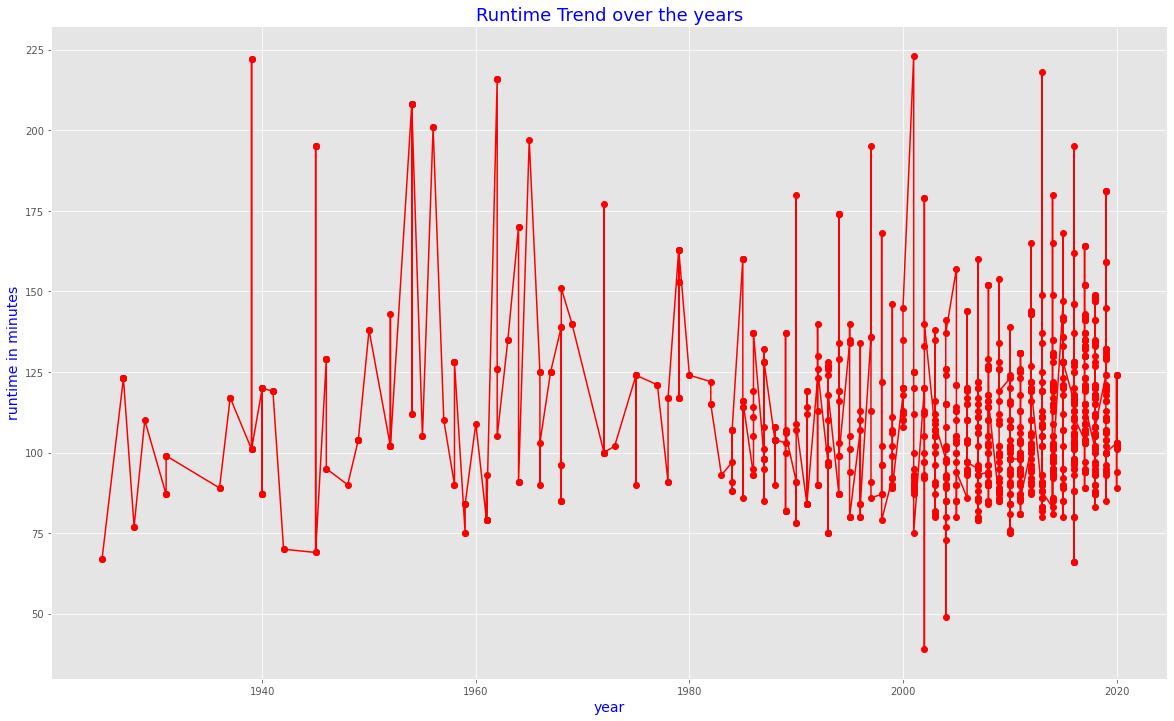

In [40]:
#plotting a line graph to show the trend of how runtime has changed over the years
fig, ax = plt.subplots(figsize=(20,12)) 
plt.plot(rotten_df['year'], rotten_df['runtime_min'], color='red', marker='o')
plt.title('Runtime Trend over the years', fontsize=18, color = 'blue')
plt.xlabel('year', fontsize=14, color = 'blue')
plt.ylabel('runtime in minutes', fontsize=14, color = 'blue')
plt.grid(True)
plt.show()

##### From the above line graph, we can conclude that the runtime of films has no significant difference since most films lie between 75 and 150 minutes. We can also note that the there has been an increase in the production of films in the recent past compared to half a century ago. 

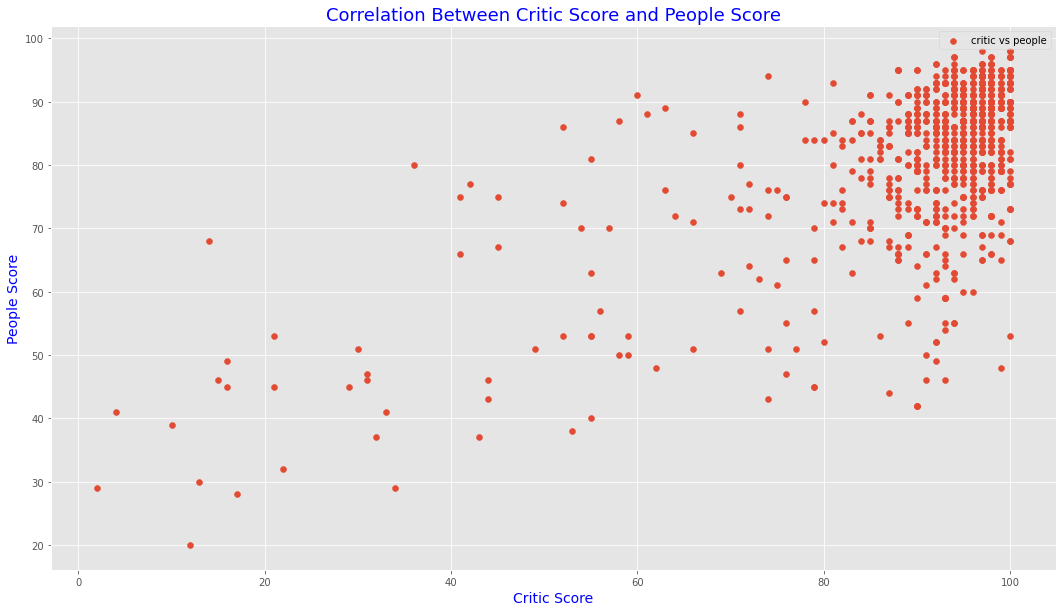

In [41]:
#plotting the correlation between critic score and people score
fig, ax = plt.subplots(figsize=(18,10))

plt.scatter(x=rotten_df['critic_score'], y=rotten_df['people_score'], label = 'critic vs people')

plt.xlabel('Critic Score', color = 'blue', fontsize=14)
plt.ylabel('People Score', color = 'blue', fontsize=14)
plt.title('Correlation Between Critic Score and People Score', color = 'blue', fontsize=18)

plt.legend()
plt.show();

##### From the above scatter plot, we can see that the correlation between critic score and people score is positive. This implies that the measure used by critics to rate a film is almost similar to that of the people. 

In [42]:
#grouping columns by type
columns = ['type', 'box_office_(gross_usa)']
rotten_df = rotten_df.groupby('type')['box_office_(gross_usa)'].mean()
rotten_df = rotten_df.reset_index()
rotten_df

,type,box_office_(gross_usa)
0,Action & Adventure,232.085135
1,Animation,189.090141
2,Art House & International,213.960563
3,Classics,164.719231
4,Comedy,108.247692
5,Documentary,195.943478
6,Drama,146.496053
7,Horror,116.603922
8,Kids & Family,212.179747
9,Musical & Performing Arts,160.161111


In [43]:
#sorting the sum of the total gross income from the highest
rotten_df = rotten_df.sort_values('box_office_(gross_usa)', ascending=False) 

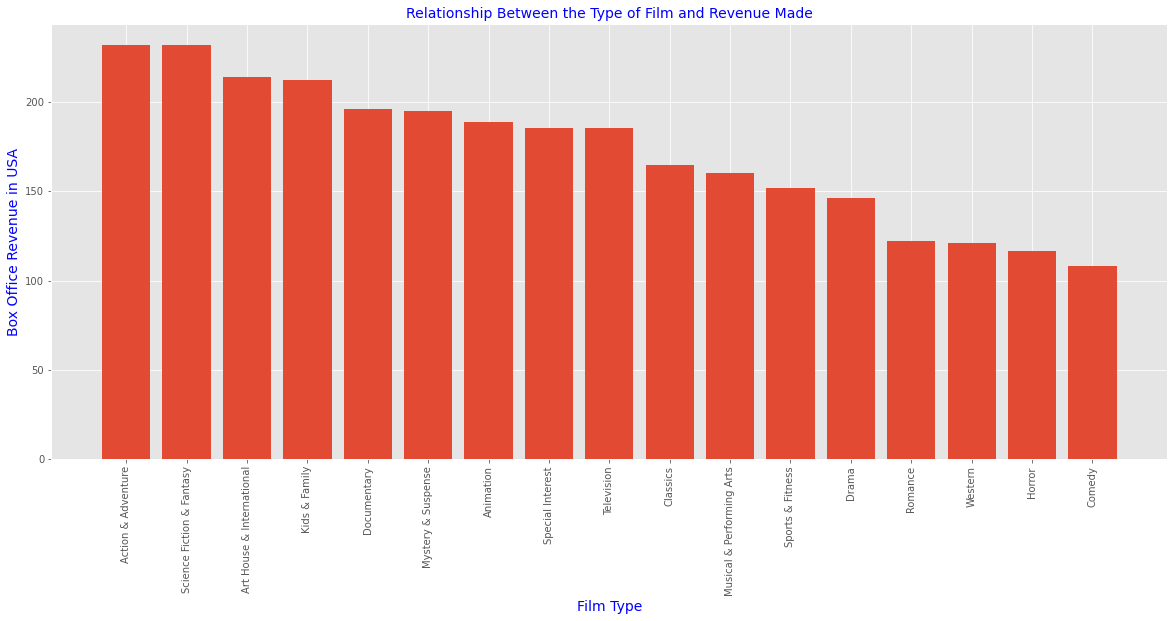

In [44]:
#plotting a barplot for the film type and the box office profits
fig, ax = plt.subplots(figsize=(20,8))
plt.bar( x= rotten_df['type'], height= rotten_df['box_office_(gross_usa)'])
plt.xlabel('Film Type',color = 'blue', fontsize=14)
plt.ylabel('Box Office Revenue in USA',color = 'blue', fontsize=14)
plt.title('Relationship Between the Type of Film and Revenue Made', color = 'blue', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

##### The above bar plot represents the different types or genres of films and their corresponding profits in USA. We see that the most profitable genres include Science Fiction & Fantasy, Action & Adventure, Kids & family, among other profitable genres.